# Distribution of digits in the decimal representation of the square root of primes

## modules

In [1]:
from decimal import *
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import *

## functions

In [2]:
def clip(dec, first, last):
#     getcontext().prec = last
    
    if last - first <= 0:
        print("Argument Error: {} is greater than {}.".format(first, last))
    else:
        int_length = len(str(int(dec)))
        mstr = format(dec, '.{}f'.format(last-int_length)).replace('.','')
    
    return mstr[first:]

def get_hist(mstr):
    return {str(c): mstr.count(str(c)) for c in range(10)}

## distribution of the square root of a prime

In [3]:
prm = 7
div, step = 10, 10**3
N = div*step

getcontext().prec = N

dec = Decimal(prm).sqrt()
hists = {'{}...{}'.format(k+1,k+step): get_hist(clip(dec, k, k+step)) for k in tqdm(range(0,N,step))}
# for k,v in hists.items():
#     print(k, v, sum(list(v.values())))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

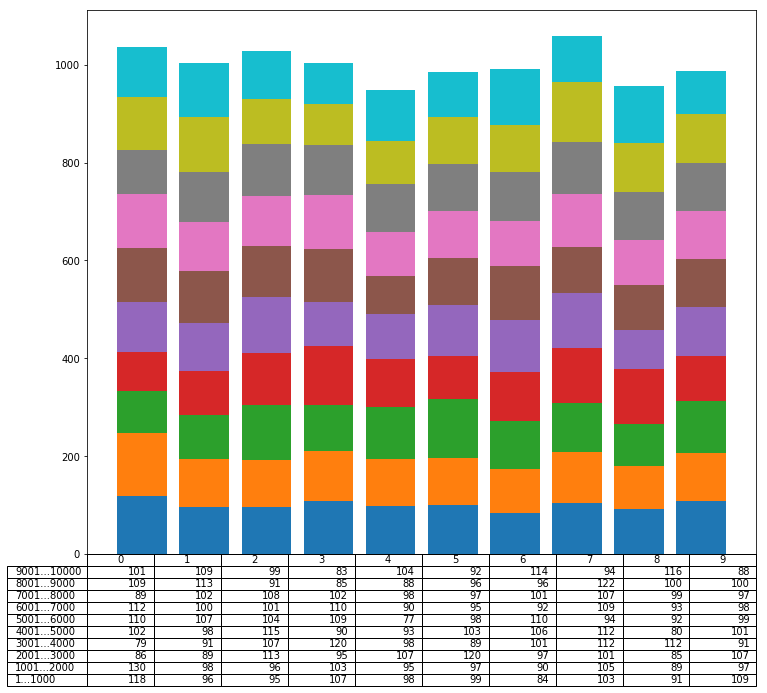

In [4]:
plt.figure(figsize=(12,10))

Y_shift = [0 for k in range(10)]
cell_text = []
for hist in tqdm(hists.values()):
    Y = list(hist.values())
    cell_text.append([str(v) for v in Y])
    plt.bar(range(10), Y, bottom = Y_shift)
    Y_shift = [Y_shift[i]+Y[i] for i in range(10)]
else: 
    plt.xticks(range(10), hist.keys())
    cell_text.reverse()
    
rls = list(hists.keys())
rls.reverse()

plt.table(cellText=cell_text,
          rowLabels=rls,
          colLabels=list(range(10)),
          loc='bottom')
plt.xticks([])

plt.show()

## distribution of multiple square roots

In [5]:
div, step = 5, 2000
N = div*step

getcontext().prec = N

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

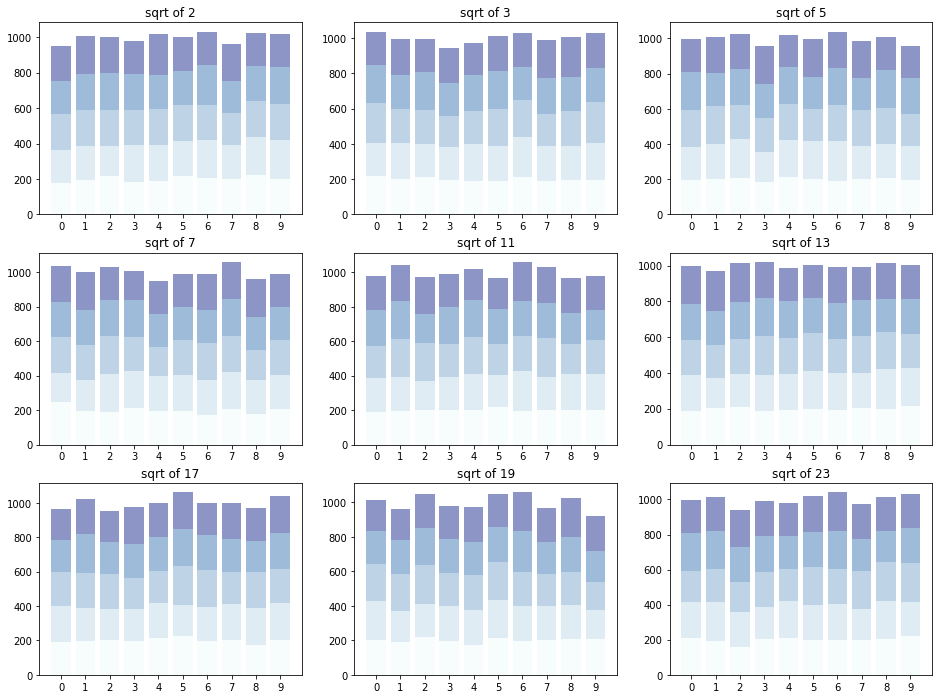

In [6]:
plt.figure(figsize=(16,12))
colors = plt.cm.BuPu(np.linspace(0, 0.5, div))

nums = [2, 3, 5, 7, 11, 13, 17, 19, 23]
for k in tqdm(range(len(nums))):
    dec = Decimal(nums[k]).sqrt()
    hists = [get_hist(clip(dec, k, k+step)) for k in range(0,N,step)]

    plt.subplot(331+k)
    plt.title('sqrt of {}'.format(nums[k]))

    Y_shift = [0 for k in range(10)]
    for i in range(div):
        Y = list(hists[i].values())
        plt.bar(range(10), Y, bottom = Y_shift, color = colors[i])
        Y_shift = [Y_shift[k]+Y[k] for k in range(10)]
    else:
        plt.xticks(range(10), hists[0].keys())
#         plt.yscale('symlog')
    
plt.show()